In [1]:
from linares_plot import *
import statsmodels.formula.api as smf
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

#### Load data

In [2]:
df_2_b = pd.read_excel('2_bumps_interference.xlsx') ## data of 2 simultaneous bumps
df_1_b = pd.read_excel('1_bump_drift.xlsx') ## data of 1 bump

### 2 bumps interference
You can find a regime where you have repulsion for closer eccentricity and attraction for far eccentricity

Plot the spectrum of interest

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


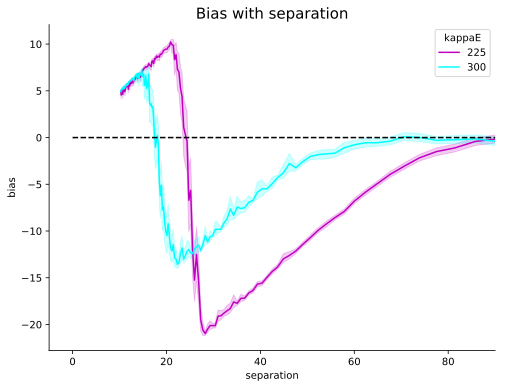

In [3]:
df = df_2_b.loc[df_2_b['success']==True] 

plt.figure(figsize=(8,6))
g = sns.lineplot( x="separation", y="bias", hue='kappas_E', ci=95 , palette=['m', 'cyan'], data=df, legend=False) 
plt.plot([0, max(df['separation'])], [0,0], 'k--') 
plt.title('Bias with separation', fontsize=15) #condition title
plt.gca().spines['right'].set_visible(False) #no right axis
plt.gca().spines['top'].set_visible(False) #no  top axis
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.legend(title='kappaE', loc='upper right', labels=[str(i) for i in [225, 300]] )
plt.xlim(-5, 90)
plt.show(block=False)


In [7]:
df['separation'].max()

240.0

Plot the whole spectrum

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


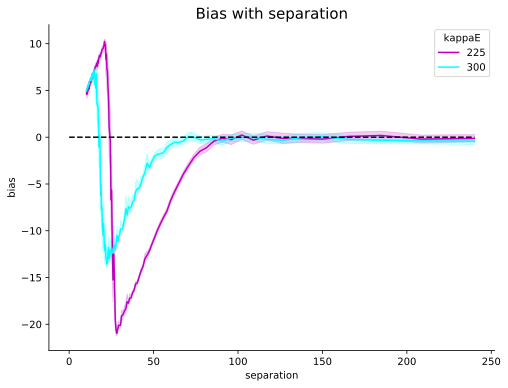

In [4]:
plt.figure(figsize=(8,6))
g = sns.lineplot( x="separation", y="bias", hue='kappas_E', ci=95 , palette=['m', 'cyan'], data=df, legend=False) 
plt.plot([0, max(df['separation'])], [0,0], 'k--') 
plt.title('Bias with separation', fontsize=15) #condition title
plt.gca().spines['right'].set_visible(False) #no right axis
plt.gca().spines['top'].set_visible(False) #no  top axis
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.legend(title='kappaE', loc='upper right', labels=[str(i) for i in [225, 300]] )
plt.show(block=False)


### 1 bump drift

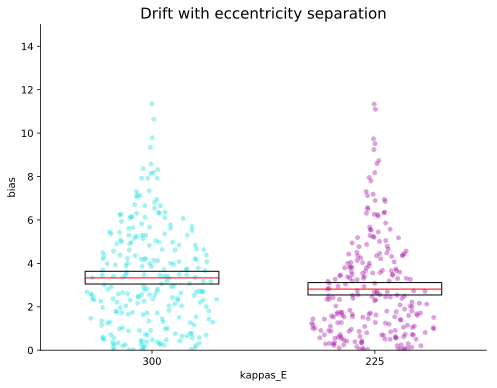

In [5]:
df1_corr = df_1_b.loc[df_1_b['success']==True] ### remove the wrong ones
df1_corr = df1_corr.loc[df1_corr['n_bumps']==1] ### keep the ones with one bump
df1_corr =df1_corr.loc[df1_corr['bias']<50] ### remove extreme cases

plt.figure(figsize=(8,6)) ## plot linares
linares_plot( x="kappas_E", y="bias", order=[300, 225],  palette=['cyan', 'm'], alpha=0.4, point_size=5, df=df1_corr) 
plt.title('Drift with eccentricity separation', fontsize=15) #condition title
plt.gca().spines['right'].set_visible(False) #no right axis
plt.gca().spines['top'].set_visible(False) #no  top axis
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.ylim(0, 15)
plt.show(block=False)

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


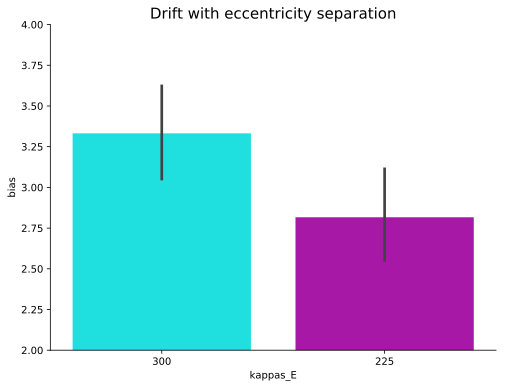

In [9]:
df1_corr = df_1_b.loc[df_1_b['success']==True] ### remove the wrong ones
df1_corr = df1_corr.loc[df1_corr['n_bumps']==1] ### keep the ones with one bump
df1_corr =df1_corr.loc[df1_corr['bias']<50] ### remove extreme cases

plt.figure(figsize=(8,6)) ## plot linares
sns.barplot( x="kappas_E", y="bias", order=[300, 225],  palette=['cyan', 'm'], ci=95, data=df1_corr) 
plt.title('Drift with eccentricity separation', fontsize=15) #condition title
plt.gca().spines['right'].set_visible(False) #no right axis
plt.gca().spines['top'].set_visible(False) #no  top axis
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.ylim(2, 4)
plt.show(block=False)

#### Liniar regression (More angle error closer to center (higer kappa_E)
This happens because the bump is "thicker", so it drifts less due to noise.

In [30]:
res_m = smf.ols(formula='bias ~ kappas_E', data=df1_corr).fit()
print(res_m.summary())

                            OLS Regression Results                            
Dep. Variable:                   bias   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     6.072
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0141
Time:                        12:19:26   Log-Likelihood:                -1086.2
No. Observations:                 483   AIC:                             2176.
Df Residuals:                     481   BIC:                             2185.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2703      0.741      1.713      0.0

### Codes for the simulations

2 bumps interference

In [ ]:
# from model import *
# from joblib import Parallel, delayed
# import multiprocessing

# numcores = multiprocessing.cpu_count() ## run in paralel, in the cluster use all the cores available (for simulations)
# distances_test =  list(np.linspace(1.5, 35, 150))  #range(2,35)   

# kappa_e_test = [ 300, 225] 
# kappa_i_test = [ 30, 15]      

# rep_dist = 100

# n_kappas= len(kappa_e_test) # len of kappas 
# n_sepa = len(distances_test)

# separations= distances_test * rep_dist * n_kappas

# kappas_e=[]
# kappas_i=[]

# for idx, k in enumerate(kappa_e_test):
#     kappas_e = kappas_e + [k]*n_sepa*rep_dist
#     kappas_i = kappas_i + [kappa_i_test[idx]]*n_sepa*rep_dist


# results = Parallel(n_jobs = numcores)(delayed(model)(totalTime=2000, targ_onset=100,  presentation_period=350, separation=sep, tauE=9, tauI=4,  n_stims=2, I0E=0.1, I0I=0.5,
#  GEE=0.025, GEI=0.019, GIE=0.01 , GII=0.1, sigE=1.0, sigI=1.6, kappa_E=kape, kappa_I=kapi, kappa_stim=75, N=512, plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False)  for sep, kape, kapi in zip(separations, kappas_e, kappas_i)) 

# biases = [results[i][0] for i in range(len(results))]
# separationts = [results[i][1] for i in range(len(results))]   
# kappas__e = [results[i][2] for i in range(len(results))]      
# kappas__i = [results[i][3] for i in range(len(results))]                                                         
# succs = [results[i][6] for i in range(len(results))]   


# df=pd.DataFrame({'bias':biases, 'separation':separationts, 'kappas_E':kappas__e, 'kappas_I':kappas__i, 'success':succs })
# ### df.to_excel('/home/david/Desktop/2_bumps_interference.xlsx')

1 bump angle error (drift)

In [ ]:
# kappa_e_test = [ 300, 225] 
# kappa_i_test = [ 30, 15] 

# rep_dist = 250
# n_kappas= len(kappa_e_test)

# kappas_e=[]
# kappas_i=[]

# for idx, k in enumerate(kappa_e_test):
#     kappas_e = kappas_e + [k]*rep_dist
#     kappas_i = kappas_i + [kappa_i_test[idx]]*rep_dist


# results2 = Parallel(n_jobs = numcores)(delayed(model)(totalTime=2000, targ_onset=100,  presentation_period=350, separation=0, tauE=9, tauI=4,  n_stims=1, I0E=0.1, I0I=0.5,
#  GEE=0.025, GEI=0.019, GIE=0.01 , GII=0.1, sigE=1, sigI=1.6, kappa_E=kape, kappa_I=kapi, kappa_stim=75, N=512, plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False)  for kape, kapi in zip( kappas_e, kappas_i)) 

# biases = [results2[i][0] for i in range(len(results2))]
# separationts = [results2[i][1] for i in range(len(results2))]   
# kappas__e = [results2[i][2] for i in range(len(results2))]      
# kappas__i = [results2[i][3] for i in range(len(results2))]                                                         
# succs = [results2[i][6] for i in range(len(results2))]   
# num_bumps = [results2[i][-1] for i in range(len(results2))]  


# df1=pd.DataFrame({'bias':biases, 'kappas_E':kappas__e, 'kappas_I':kappas__i, 'success':succs, 'n_bumps':num_bumps })
# ### df1.to_excel('/home/david/Desktop/1_bump_drift.xlsx')
